In [59]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import safe
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import safe as sf
import datamol as dm
from safe.tokenizer import SAFETokenizer

# Load the trained model and tokenizer
checkpoint_path = ".saved_model/phi1_5-safmol_0528/checkpoint-7500"
model = AutoModelForCausalLM.from_pretrained(checkpoint_path)

# Set the model to evaluation mode
model.eval()


# Let's make some Molecules!

In [74]:
tokenizer = SAFETokenizer().load(checkpoint_path+"/tokenizer.json")

designer = sf.SAFEDesign(model=model,tokenizer=tokenizer)
generated_smiles = designer.de_novo_generation(sanitize=True, n_samples_per_trial=100)

  0%|          | 0/1 [00:00<?, ?it/s]

2024-05-28 16:13:00.435 | INFO     | safe.sample:de_novo_generation:577 - After sanitization, 43 / 100 (43.00 %) generated molecules are valid !


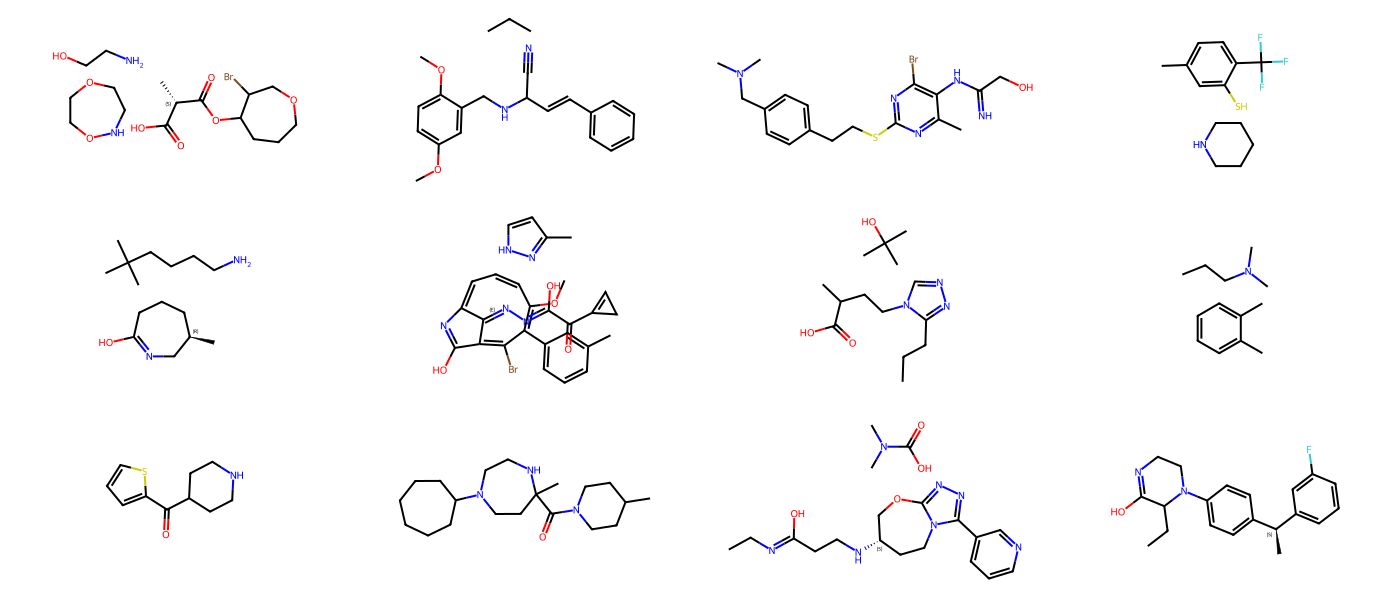

In [75]:
dm.to_image(generated_smiles[:12], mol_size=(350, 200))
